# Sentiment Classification Movie Review

The goal is to predict the sentiment (positive or negative) of a given movie review. 

## Naive Bayes


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('labeledTrainData.tsv', sep='\t',usecols=['review','sentiment'])

In [26]:
data.sample(5)

,sentiment,review
17790,0,It seems evident from this adaptation that he ...
20376,1,"As others have commented, I checked this out a..."
20064,1,<br /><br />Have you ever felt like your being...
23830,1,"Joan Fontaine is \A Damsel in Distress\"" in th..."
19153,0,"Where to begin? <br /><br />#1 Amitabh's son, ..."


<Axes: xlabel='sentiment', ylabel='count'>

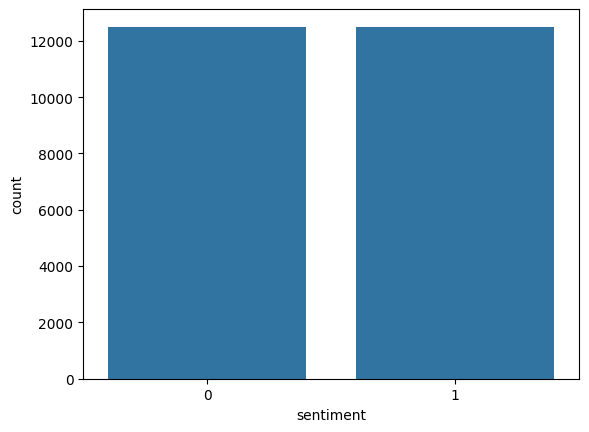

In [10]:
sns.barplot(data['sentiment'].value_counts())

## Text Preprocessing

#### Removing Stop Words

In [81]:
import nltk
from nltk.corpus import stopwords

def remove_stopwords(text):
    x = []
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
    return x

data['cleaned_review'] = data['review'].apply(remove_stopwords)

#### Lemmatization or Stemming

In [69]:
import nltk

# Specify the data path where NLTK should look for resources
nltk.data.path.append("/path/to/nltk_data")

# Download the "wordnet" resource
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(lemmatized_text)

data['cleaned_review'] = data['review'].apply(lemmatize_text)

#### Removing special characters

In [71]:
import re

def remove_special_characters(text):
    # Remove special characters and punctuation
    clean_text = re.sub('[^A-Za-z\s]', '', text)
    return clean_text

data['cleaned_review'] = data['review'].apply(remove_special_characters)

#### Converting to lower case

In [72]:
def convert_to_lowercase(text):
    # Convert text to lowercase
    lowercase_text = text.lower()
    return lowercase_text

data['cleaned_review'] = data['review'].apply(convert_to_lowercase)

#### Removing Numerical digits

In [73]:
def remove_numeric(text):
    # Remove numeric values
    clean_text = re.sub(r'\d+', '', text)
    return clean_text

data['cleaned_review'] = data['review'].apply(remove_numeric)

#### Removing symbols

In [74]:
import re

def remove_symbols(text):
    # Remove symbols using regular expression
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

data['cleaned_review'] = data['review'].apply(remove_symbols)

#### Text Processing Completed

In [ ]:
data['cleaned_review'].sample(1)

Exporting cleaned data set to csv file and importing and splitting the data set 

data.to_csv('cleaned.csv',index=False)

In [28]:
df = pd.read_csv('cleaned.csv',usecols=['cleaned_review','sentiment'])

In [29]:
import re

def removing_specific_symbols(text):
    # Remove symbols using regular expression
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

df['review'] = df['cleaned_review'].apply(removing_specific_symbols)

In [30]:
df = df[['review','sentiment']]

#### Splitting Data set

In [31]:
X = df[['review']]
y = df['sentiment']

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary data into training (80%) and validation (20%)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [33]:
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape)

(15000, 1) (15000,) (5000, 1) (5000,) (5000, 1) (5000,)


#### Vectorizing Features

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)

In [35]:
X_train = cv.fit_transform(X_train['review']).toarray()

In [36]:
X_valid = cv.transform(X_valid['review']).toarray()

In [37]:
X_test = cv.transform(X_test['review']).toarray()

In [38]:
X_train.shape

(15000, 1000)

In [39]:
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape)

(15000, 1000) (15000,) (5000, 1000) (5000,) (5000, 1000) (5000,)


In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [41]:
def train_model(models, X_train, y_train,X_valid,y_valid):
    for model in models:
        model.fit(X_train,y_train)
        
        # Evaluate the model on the validation set
        accuracy = model.score(X_valid, y_valid)
        
        print(f'Accuracy % of {model.__class__.__name__}: {accuracy}')
        print('----------------------------------------------')


# Define the list of models
models = [GaussianNB(), MultinomialNB(), BernoulliNB()]

# Train and evaluate the models
train_model(models, X_train, y_train,X_valid,y_valid)

Accuracy % of GaussianNB: 0.792
----------------------------------------------
Accuracy % of MultinomialNB: 0.82
----------------------------------------------
Accuracy % of BernoulliNB: 0.8262
----------------------------------------------


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
bernoulli_nb = BernoulliNB()
grid_search = GridSearchCV(bernoulli_nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'alpha': 0.5}
Best Cross-Validation Score: 0.82


In [43]:
model = BernoulliNB(alpha=0.5)
model.fit(X_train,y_train)

BernoulliNB(alpha=0.5)

In [44]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Test Accuracy: {:.2f}".format(accuracy))


Test Accuracy: 0.83


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf=KFold(n_splits=5)
score=cross_val_score(model,X_train,y_train,cv=kf)
print(model)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

BernoulliNB(alpha=0.5)
Cross Validation Scores are [0.81433333 0.827      0.82566667 0.812      0.817     ]
Average Cross Validation score :0.8192


In [52]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = model.predict(X_valid)
print("Precision = ",format(precision_score(y_valid,prediction)))
print("Recall = ",format(recall_score(y_valid,prediction)))
print("F-1 Score = ",format(f1_score(y_valid,prediction)))

Precision =  0.8121442125237192
Recall =  0.8515718265021887
F-1 Score =  0.8313908313908314


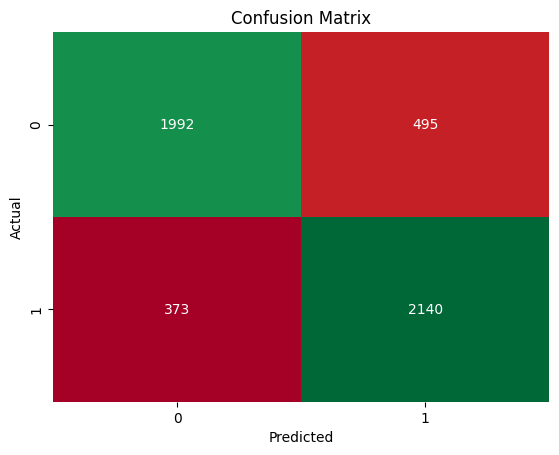

In [47]:
from sklearn.metrics import confusion_matrix

prediction = model.predict(X_valid)
cm = confusion_matrix(y_valid, prediction)

labels = np.unique(y_valid)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [48]:
TN, FP, FN, TP = cm.ravel()
accuracy = (TN + TP) / (TN + FP + FN + TP)
print("Accuracy Score =", format(accuracy))

Accuracy Score = 0.8264


#### Prototype for Model Deployment

In [88]:
# Get user input
print('Enter the review:')
user_input = input()

# Create a DataFrame with a column containing the user input
df_user_input = pd.DataFrame({'text_column': [user_input]})

# Use the CountVectorizer to transform the preprocessed user input
input_data = cv.transform(df_user_input).toarray()

# Predict using the trained model
predicted_class = model.predict(input_data)

# Print the user input and predicted class
print(f"Review: {user_input}")
if predicted_class == 1:
    print('The Review was Positive')
else:
    print('The Review was Negative')

Enter the review:
Review: wow 12 great \ movie
The Review was Positive
